<h1 style="color:blue">Praktikum 9. Masinõpe.</h1>
<h3 style="color:blue">Juhendamata õpe. Visualiseerimine</h3>
<h4>1. november 2016 </h4>
<h4>Ülesannete esitamise tähtaeg 15. november.</h4>

*Scatterplot*'i koodinäide

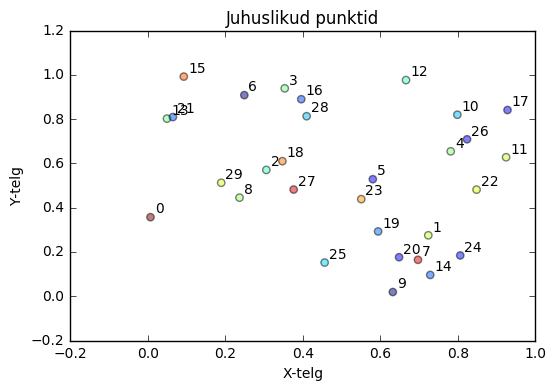

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 30
x = np.random.rand(N)
y = np.random.rand(N) # genereerime N juhuslikku punkti koordinaati
colors = np.random.rand(N) # genereerime N juhuslikku värvi
radius = 3
area = np.pi * (radius)**2 # fikseerime punktide suuruse
plt.scatter(x, y, s=area, c=colors, alpha=0.5) # kuvame punktid scatterplotil poolenisti läbipaistvana (alpha)
for i in range(N):
    # kuvame iga punkti kõrvale tema väärtuse
    plt.annotate(str(i),xy=(x[i],y[i]),xytext=(radius,radius),textcoords='offset points') 
plt.title("Juhuslikud punktid")
plt.xlabel("X-telg")
plt.ylabel("Y-telg")
plt.show()

### Ülesanne 1. Ravimidokumentide visualiseerimine tasapinnal (3p)

**Andmed.** Selles ülesandes kasutame kaustas *valik_infolehti* olevaid ravimi pakendi infolehti (50tk).

**Eesmärk.** Viia dokumendid vektorkujule (nagu 7. praktikumi ülesandes 1A) ning visualiseerida neid tasapinnal, kasutades järgmiseid meetodeid:

* PCA

* MDS

* t-SNE

Dokumentidest peaks tekkima 4 vektormudelit, kus tunnustena on kasutatud:

* tekstisõnesid,

* lemmasid,

* sõnaliike (*partofspeech* EstNLTK väljundis),

* kogu grammatilist informatisoooni (*form* EstNLTK väljundis).


Lahendusena esitada lisaks koodile ka saadud hajuvusdiagrammid (*scatter plot*) (4 mudelit * 3 meetodit = 12 diagrammi). Dokumendid peaksid olema diagrammil eristatavad toimeaine (alprasolaam, paratsetamool, ramipriil) alusel (kasuta eri värve!). Dokumentidele vastavad toimeained leiab failinimedest. Varusta diagramm ka legendiga, mis annaks informatsiooni värvide ja klasside (toimeainete) vastavuse kohta. Milliste mudelite ja meetoditega on dokumendiklassid visuaalselt
paremini eristatavad?

**Vihjeid:**
* kõigi visualiseerimismeetodite puhul argument: n_components = 2
* MDS kasutab vaikimisi distantsimeetrikuna eukleidilist kaugust
* koosinuskauguse kasutamiseks tuleb eelnevalt arvutada kaugusmaatriks
* kaugusmaatriksi arvutamine:
      from sklearn.metrics.pairwise import pairwise_distances
      distance_matrix = pairwise_distances(data, metric='cosine')
* MDSi kasutamine eelnevalt arvutatud kaugusmaatriksiga:
      MDS(distance_matrix, dissimilarity='precomputed')
*  tSNE puhul anda järgmised argumendid:

      random_state=0, metric='cosine', learning_rate=50
      
     * soovitav on viimase argumendi väärtusega ka pisut eksperimenteerida, et näha selle mõju hajuvusdiagrammile
     
     
* visualiseerimisel matplotlib.pyplot.scatter
* diagrammide salvestamine: pyplot.savefig()

### Ülesanne 2. Ravimidokumentide klasterdamine kasutades k-means ja DBSCAN algoritme (2p)

**Andmed.** Selles ülesandes kasutame 1. ülesandes tekkinud vektormudeleid (4tk).

**Eesmärk.** Teostada dokumentidele klasterdamine kasutades järgmiseid meetodeid:

* k-means

* DBSCAN

**Lahendusena** esitada klasterdamistulemuste tasapinnalised visualisatsioonid (4 mudelit x 2 meetodit = 8 diagrammi). Tulemuste kuvamiseks kasuta eelmises ülesandes tekkinud PCA diagramme, kus tõesed märgendid (*ground truth*) on eristatavad värvi alusel (nagu eelmiseski ülesandes) ning klasterdamise käigus saadud märgendid on eristatavad markeri kuju (nt **+**, **^**, **X** jne) alusel.

**Vihjeid:**

● DBSCAN puhul kasutada kaugusmeetrikuna koosinuskaugust

● Markerite stiilist: ​ http://matplotlib.org/api/markers_api.html

### Ülesanne 3. Ravimidokumentide klasterdamine kasutades hierarhilist klasterdamist (2p)
**Andmed.** Selles ülesandes kasutame 1. ülesandes tekkinud vektormudeleid (4tk).
**Eesmärk.** Teostada dokumentidele klasterdamine kasutades aglomeratiivse hierarhilise klasterdamise algoritmi.

**NB!** Selles ülesandes tasub kasutada sklearni asemel scipy teeki! Põhjus: scipy abil on dendrogrammide visualiseerimine oluliselt lihtsam ja mugavam! Scipy vastava funktsionaalsusega tutvumiseks vt vihjeid!

**Lahendusena** esitada 4 dendrogrammi, mille lehed on märgendatud vastavate dokumentide klassidega (toimeainetega). Millise mudeli puhul on klasterdamistulemused parimad (visuaalse hindamise alusel)?

**Vihjeid:**

* Vajalikud importid:

     * from sklearn.metrics import pairwise_distances (teeb sama, mis sklearni pairwise_distances)
     * from scipy.cluster.hierarchy import linkage,dendrogram
* Hierarhilise klasterdamise aluseks on kaugusmaatriks:
     * distance_matrix = pairwise_distances(data,metric="cosine")
* Kaugusmaatriks arvutatud, tuleb meil arvutada aheldusmaatriks (*linkage matrix*).

  Aheldusmaatriksis hoitakse informatsiooni selle kohta, millised punktid kokku klasterdati (aheldati). Aheldusmaatriksit tehes tuleb ära määrata ka ahelduse liik (*single*  http://en.wikipedia.org/wiki/Single­linkage_clustering või *complete*
http://en.wikipedia.org/wiki/Complete­linkage_clustering). 
Selles ülesandes kasutagem *complete*.

     * linkage_matrix = linkage(distance_matrix,"complete")
* Aheldusmaatriksi alusel loome dendrogrammi (​ labels olgu dokumentidele vastavate
toimeainete järjend):
     * dendrogram(linkage_matrix,labels=labels)